<a href="https://colab.research.google.com/github/pui-sum-rv/lab3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Thresholding and Binary Morphology

These laboratory excersises are solved on Google Colab and are save on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **koji uključuje vaše ime**.

## Copying Files from a GitHub Repository

To complete the exercises, you will need images and other files that are located in the GitHub repository of the exercise. This command will be available in the notebook for each exercise. It will copy files from GitHub to the Google Colab environment.

**You need to run this command before starting each exercise.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab2 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 37 (delta 4), reused 13 (delta 2), pack-reused 14 (from 1)
Receiving objects: 100% (37/37), 6.06 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Google Colab will occasionally delete all files.** Therefore, it may be necessary to rerun this command between sessions. If you are getting errors about missing files, try running the above command again.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Thresholding

## What is Thresholding?

The simplest segmentation method

Application example: Separate out regions of an image corresponding to
objects which we want to analyze. This separation is based on the variation
of intensity between the object pixels and the background pixels.

To differentiate the pixels we are interested in from the rest (which will
eventually be rejected), we perform a comparison of each pixel intensity
value with respect to a threshold (determined according to the problem to
solve).

Once we have separated properly the important pixels, we can set them with
a determined value to identify them (i.e. we can assign them a value of 0
(black), 255 (white) or any value that suits your needs).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Example.jpg)


## Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a
threshold value, it is assigned one value (may be white), else it is assigned
another value (may be black). The function used is `cv2.threshold`. First
argument is the source image, which should be a grayscale image. Second
argument is the threshold value which is used to classify the pixel values.
Third argument is the ` maxVal ` which represents the value to be given if pixel
value is more than (sometimes less than) the threshold value. OpenCV provides
different styles of thresholding and it is decided by the fourth parameter of
the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

To illustrate how these thresholding processes work, let’s consider that we
have a source image with pixels with intensity values $` src(x,y) `$.
The plot below
depicts this. The horizontal blue line represents the threshold $` thresh `$ (fixed).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Base_Figure.png)

The documentation clearly explains what each type is meant for. [Please check out the
documentation](http://docs.opencv.org/doc/tutorials/imgproc/threshold/threshold.html).

## Task 3

Using OpenCV, load the image `images/apple.jpg` as a **grayscale** image. Perform simple **binary** thresholding in two ways: 1) using the OpenCV function mentioned above, and 2) using NumPy by setting all pixels above a certain value to 255 and others to 0. Display the thresholded image.

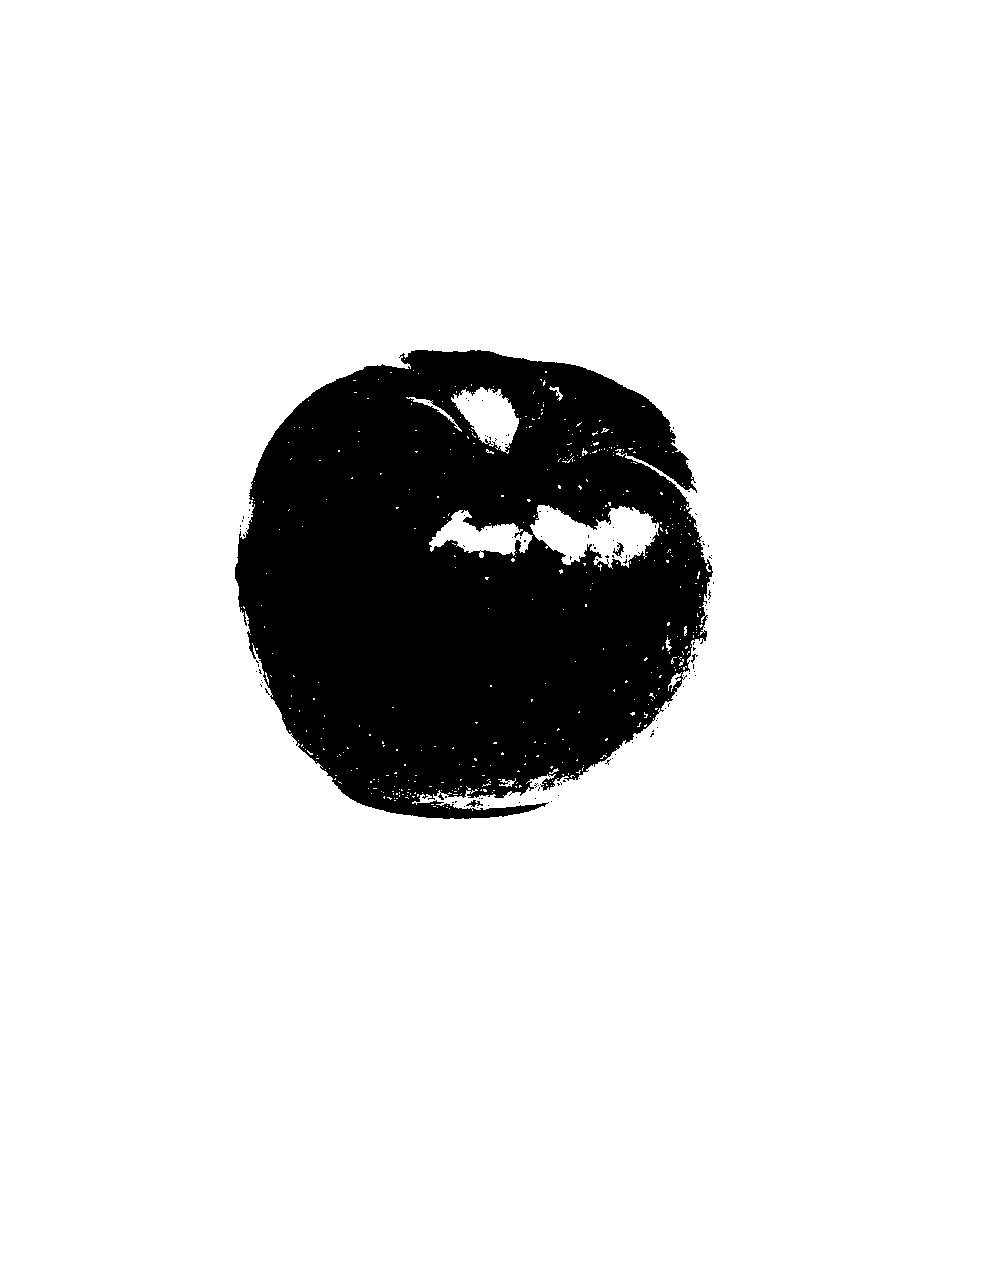

In [7]:
# opencv
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('images/apple.jpg', cv2.IMREAD_GRAYSCALE)

if image is not None:
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    cv2_imshow(binary_image)
else:
    print("No img")

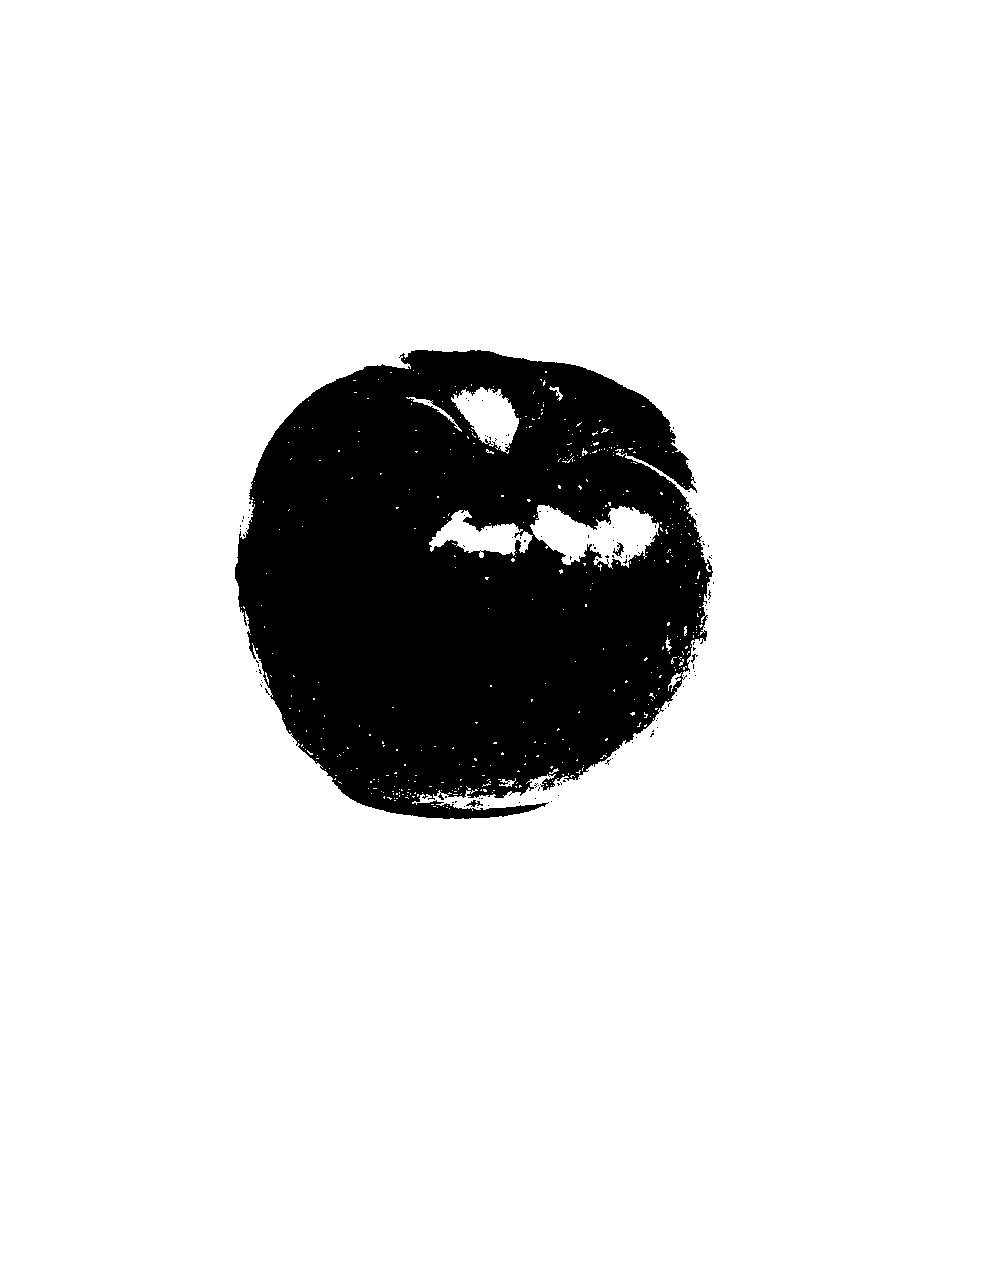

In [8]:
# numpy
import numpy as np

image = cv2.imread('images/apple.jpg', cv2.IMREAD_GRAYSCALE)

if image is not None:
    binary_image = image.copy()
    binary_image[binary_image > 127] = 255
    binary_image[binary_image <= 127] = 0

    cv2_imshow(binary_image)
else:
    print("No img")


### ### Otsu Binarization

**Binarization** of an image is the process of converting the image into a format where each pixel can only be one of two possible values. For `uint8` images, these values are usually `0` (black) and `255` (white). For `float` images, the values are `0` (black) or `1.0` (white). **Binarization** is often a precursor to **thresholding**, where the image is divided into completely white and black regions, and then only the parts of the original image that are completely white in the binary image are retained. Mathematically, by multiplying the original and binary images, the pixels that are completely white in the binary image remain unchanged, while those that are completely black are multiplied by 0, resulting in a completely black pixel in the product image.

In the previous example, you manually determined the threshold. Otsu binarization is a more advanced method that determines the optimal threshold based on the **histogram** of the image, which best separates the pixels. A histogram is a graph that shows the frequency of each value in a data set. In the case of an image, the histogram shows, for each color value, how many pixels are of that color.

Let's take a look at the histogram of the `apple.jpg` image.

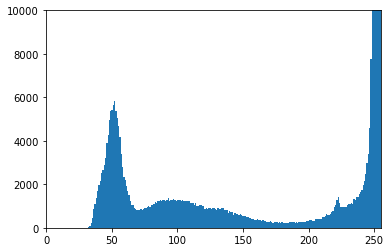

In [ ]:
img = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(), bins=256, range=(0, 255))
plt.ylim([0, 10000])
plt.xlim([0, 255])
plt.show()

From the histogram, it is evident that most pixels are grouped around the values 255 and 50. By approximation, we see that the optimal way to separate the pixels into two groups would be with a threshold between 150 and 200, as this threshold effectively separates the two largest groups of pixels.

## Task 4

According to the [following link](https://learnopencv.com/otsu-thresholding-with-opencv/), implement Otsu binarization for the `apple.jpg` image. Display the resulting binary image **using Matplotlib**. Print the optimal threshold value determined by the Otsu method to the console.

Optimal thresh: 165.0


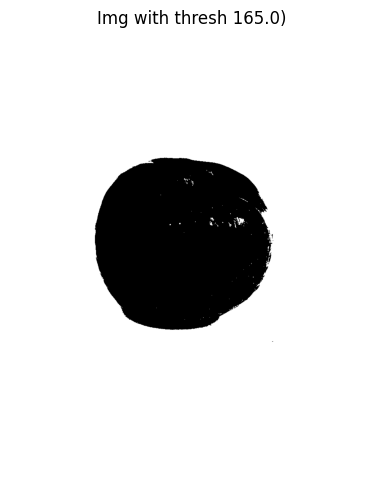

In [12]:
import cv2
import matplotlib.pyplot as plt

image_path = 'images/apple.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("No img")
else:
    otsu_thresh_val, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"Optimal thresh: {otsu_thresh_val}")

    plt.figure(figsize=(8, 6))
    plt.imshow(binary_otsu, cmap='gray')
    plt.title(f"Img with thresh {otsu_thresh_val})")
    plt.axis('off')
    plt.show()


Such a binary image can be used as a **mask** for the original image. A mask is a binary image where the value is `0` for all pixels that should not be visible, and the maximum value (`1.0` or `255`) for pixels that should be visible.

## Task 5

Using the Otsu binary image as a mask, apply the function `img_thresholded = cv.bitwise_and(img, img, mask=mask)` where `img` is the original grayscale image of the apple, and `mask` is the Otsu binary image.

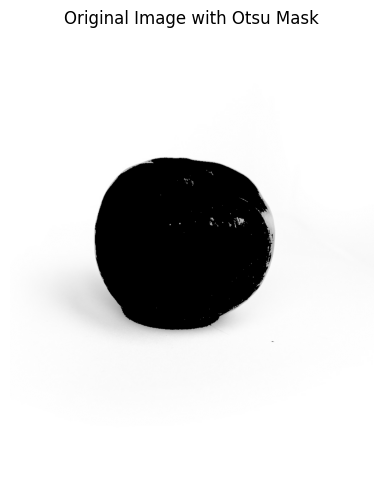

In [13]:
img_thresholded = cv2.bitwise_and(image, image, mask=binary_otsu)

plt.figure(figsize=(8, 6))
plt.imshow(img_thresholded, cmap='gray')
plt.title("Original Image with Otsu Mask")
plt.axis('off')
plt.show()


## Improving Masks with Binary Morphology

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are `erosion` and `dilation`. Then its variant forms like `opening`, `closing`, `gradient` etc. also comes into play.

Morphological operations such as `erosion`, `dilation`, `closing` and `opening` are common tools used to improve masks after they are generated by thresholding. They can be used to fill small holes, remove noise, increase or decrease the size of an object, or smoothen mask outlines.

Most morphological operations are once again simple kernel functions that are applied at each pixel of the image based on their neighborhood as defined by a `structuring element (SE)`. For example, `dilation` simply assigns to the central pixel the maximum pixel value within the neighborhood; it is a maximum filter. Conversely, `erosion` is a minimum filter. Additional options emerge from combining the two: `morphological closing`, for example, is a `dilation` followed by an `erosion`. This is used to fill in gaps and holes or smoothing mask outlines without significantly changing the mask's area. Finally, there are also some more complicated morphological operations, such as `hole filling`.

Images can be thought to be a mapping from the integer space $\mathbb{Z^2}$ to $\mathbb{R}$. For a binary image, the mapping reduces to $f: \mathbb{Z^2} \to \{0,1\}$. Every pixel at position $(x,y)\in\mathbb{Z^2}$ is either completely dark $(0)$ or completely bright $(1)$. We shall now introduce two very important set operations.

Reflection of a set $B\subseteq\mathbb{Z}^2$ is defined as $\hat{B} = \{w : w=-b, \forall b\in B\}$. E.g. if $B$ is a set of points of the form $(x,y)$, then $\hat{B}$ can be found by replacing those points by $(-x,-y)$.

Translation of a set $B\subseteq\mathbb{Z}^2$ by a point $z=(z_1,z_2)$ is defined as $(B)_z=\{c : c=b+z,\forall b\in B\}$. E.g. if $B$ is a set of points of the form $(x,y)$, then $(B)_z$ can be found by replacig those points by $(x+z_1, y+z_2)$.

Set reflection and translation are employed extensively in morphology to formulate operations based on so-called structuring elements (SEs) or kernels. SEs are basically small sets or subimages used to probe an image under study for properties of interest. Usually they are often taken in rectangular, circular, elliptical or cross shapes.

### Erosion

With $A, B \subseteq \mathbb{Z}^2$, the erosion of $A$ by $B$ (SE) is defined as $A\ominus B = \{z : (B)_z \subseteq A\}$. In words, this equation indicated that the erosion of $A$ by $B$ is the set of all points $z$ such that $B$, translated by $z$, is contained in $A$. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel (SE) slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises, detach two connected objects etc. Let us use a rectangular SE (kernel) to check this out.

In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import PIL
import cv2
import skimage as sk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
img = cv2.imread('images/binary_image.png',0)
kernel1 = np.ones((3,3), np.uint8)
erosion1 = cv2.erode(img, kernel1, iterations = 1)
kernel2 = np.ones((5,5), np.uint8)
erosion2 = cv2.erode(img, kernel2, iterations = 1)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(erosion1, cmap=plt.cm.gray)
plt.title(r'Erosion with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(erosion2, cmap=plt.cm.gray)
plt.title(r'Erosion with a $5\times5$ kernel')

### Dilation

With $A, B \subseteq \mathbb{Z}^2$, the dilation of $A$ by $B$ (SE) is defined as $A\oplus B = \{z:(\hat{B})_z\cap A \ne \phi\}$. In words, the dilation of $A$ by $B$ is the set consisting of all the structuring element origin locations where the reflected and translated $B$ overlaps at least one element of $A$.

It is just opposite of erosion. Here, a pixel element is $1$ if atleast one pixel under the kernel is $1$. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.



In [ ]:
img = cv2.imread('images/binary_image.png',0)
kernel1 = np.ones((3,3), np.uint8)
dilation1 = cv2.dilate(img, kernel1, iterations = 1)
kernel2 = np.ones((5,5), np.uint8)
dilation2 = cv2.dilate(img, kernel2, iterations = 1)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(dilation1, cmap=plt.cm.gray)
plt.title(r'Dilation with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(dilation2, cmap=plt.cm.gray)
plt.title(r'Dilation with a $5\times5$ kernel')

### Opening

The morphological opening of $A$ by $B$ is defined as $A \circ B = (A\ominus B)\oplus B = \cup\{(B)_z:(B)_z\subseteq A\}$, which is nothing but erosion followed by dilation. It is useful in removing noise.

In [ ]:
img = cv2.imread('images/binary_image.png',0)
kernel1 = np.ones((5,5), np.uint8)
opening1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)
kernel2 = np.ones((7,7), np.uint8)
opening2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(opening1, cmap=plt.cm.gray)
plt.title(r'Opening with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(opening2, cmap=plt.cm.gray)
plt.title(r'Opening with a $7\times7$ kernel')

### Closing

The morphological closing of $A$ by $B$ is defined as $A \bullet B = (A\oplus B)\ominus B$, which is nothing but dilation followed by erosion. It is useful in removing noise. It is useful in closing small holes inside the foreground objects, or small black points on the object.



In [ ]:
img = cv2.imread('images/binary_image.jpg',0)
kernel1 = np.ones((5,5), np.uint8)
closing1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
kernel2 = np.ones((7,7), np.uint8)
closing2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(closing1, cmap=plt.cm.gray)
plt.title(r'Closing with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(closing2, cmap=plt.cm.gray)
plt.title(r'Closing with a $7\times7$ kernel')

### Morphological Gradient

It is the difference between dilation and erosion of an image.

In [ ]:
img = cv2.imread('images/binary_image.jpg',0)
kernel1 = np.ones((3,3), np.uint8)
grad1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel1)
kernel2 = np.ones((5,5), np.uint8)
grad2 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(grad1, cmap=plt.cm.gray)
plt.title(r'Morphological gradient with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(grad2, cmap=plt.cm.gray)
plt.title(r'Morphological gradient with a $5\times5$ kernel')

### Tophat

In [ ]:
img = cv2.imread('images/binary_image.png',0)
kernel1 = np.ones((5,5), np.uint8)
top1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel1)
kernel2 = np.ones((9,9), np.uint8)
top2 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(top1, cmap=plt.cm.gray)
plt.title(r'Morphological tophat with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(top2, cmap=plt.cm.gray)
plt.title(r'Morphological tophat with a $9\times9$ kernel')

### Blackhat

It is the difference between the closing of the input image and input image.



In [ ]:
img = cv2.imread('images/binary_image.jpg',0)
kernel1 = np.ones((5,5), np.uint8)
black1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel1)
kernel2 = np.ones((11,11), np.uint8)
black2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(black1, cmap=plt.cm.gray)
plt.title(r'Morphological blackhat with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(black2, cmap=plt.cm.gray)
plt.title(r'Morphological blackhat with a $11\times11$ kernel')

### SEs of different shapes

OpenCV provides built-in functions for creating SEs of custom shapes like circle, ellipse, cross, etc. They turn out to be useful for dufferent purposes.

In [ ]:
# Rectangular Kernel
rect = cv2.getStructuringElement(cv2.MORPH_RECT,(25,25))
# Elliptical Kernel
ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
# Cross-shaped Kernel
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(25,25))

plt.matshow(ellip, cmap=cm.gray)
plt.title(r'A $19\times 19$ elliptical / circular kernel')

Now check the morphological closing operation with circular SEs.



In [ ]:
img = cv2.imread('images/binary_image.jpg',0)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
closing1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
closing2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(closing1, cmap=plt.cm.gray)
plt.title(r'Closing with a $5\times5$ circular kernel')
plt.subplot(133)
plt.imshow(closing2, cmap=plt.cm.gray)
plt.title(r'Closing with a $15\times15$ circular kernel')

Another example showing morphological blackhat operation with circular SEs.



In [ ]:
img = cv2.imread('images/binary_image.jpg',0)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
black1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel1)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
black2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(black1, cmap=plt.cm.gray)
plt.title(r'Blackhat with a $9\times9$ circular kernel')
plt.subplot(133)
plt.imshow(black2, cmap=plt.cm.gray)
plt.title(r'Blackhat with a $15\times15$ circular kernel')

## Tasks

1. Study previous examples and try different combinations of SE element.

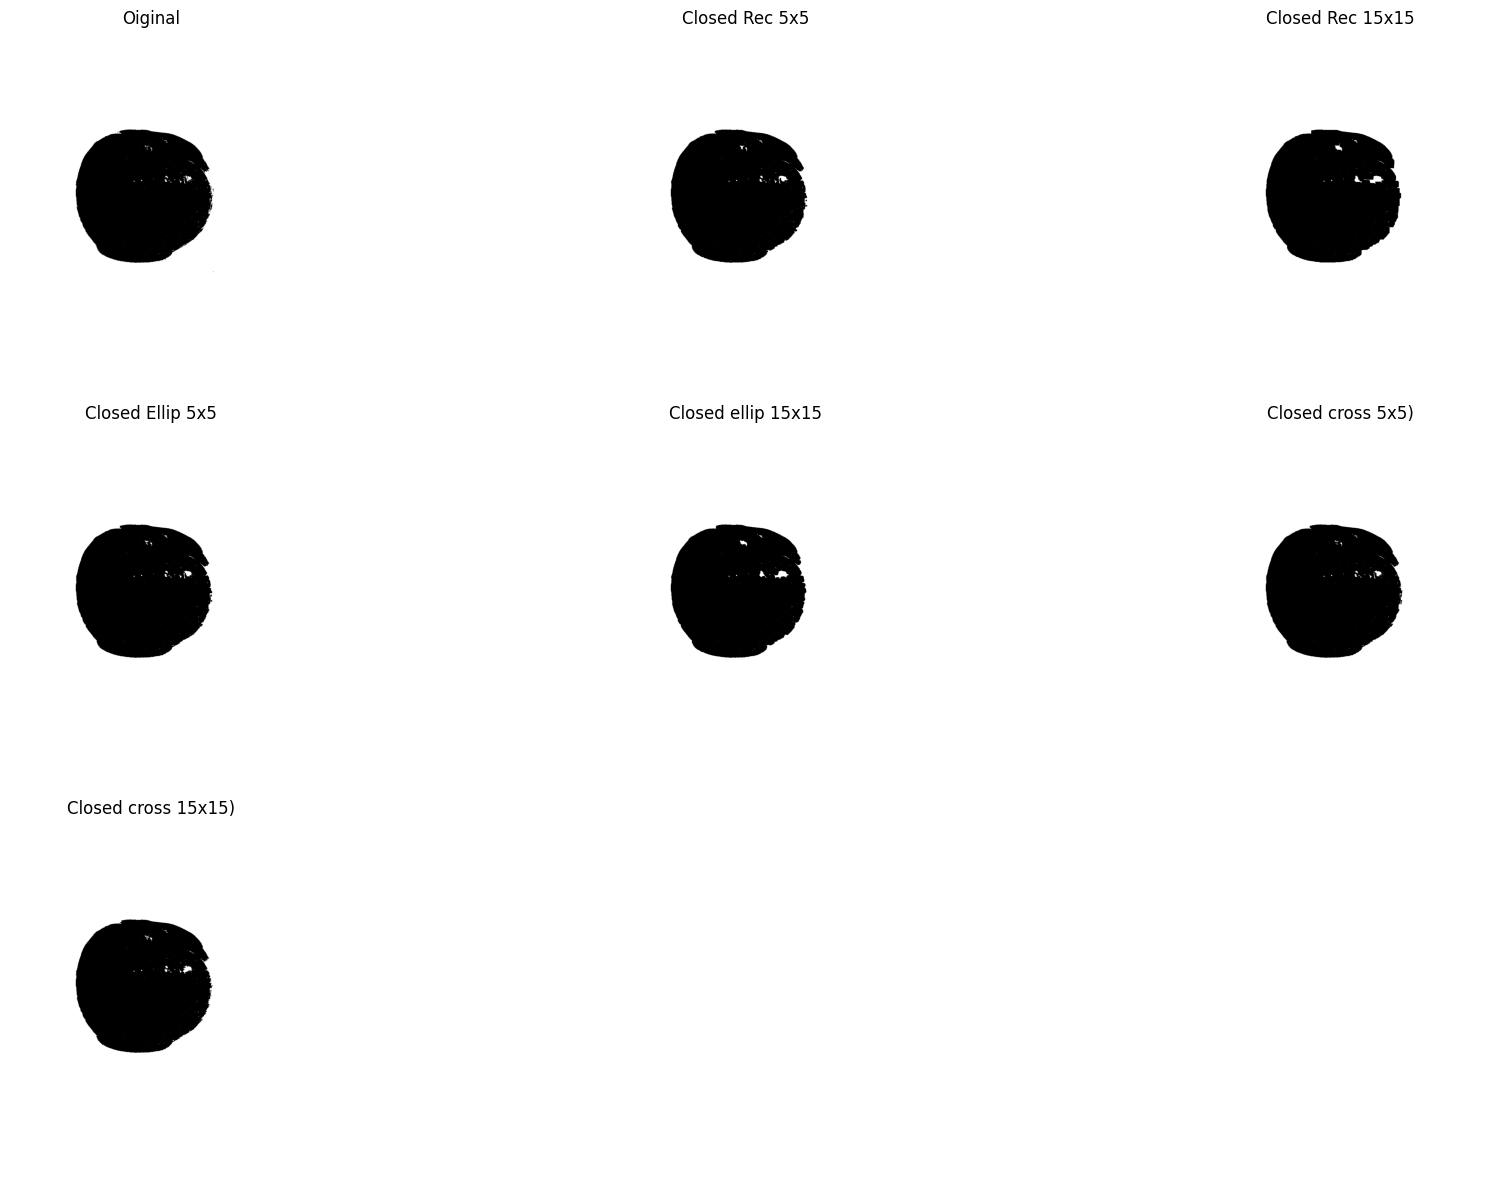

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

_, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


kernel_rect_small = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_rect_large = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

kernel_ellip_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_ellip_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

kernel_cross_small = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_cross_large = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))

# Closing morphs
closed_rect_small = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_rect_small)
closed_rect_large = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_rect_large)

closed_ellip_small = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_ellip_small)
closed_ellip_large = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_ellip_large)

closed_cross_small = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_cross_small)
closed_cross_large = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel_cross_large)

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Oiginal')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(closed_rect_small, cmap='gray')
plt.title('Closed Rec 5x5')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(closed_rect_large, cmap='gray')
plt.title('Closed Rec 15x15')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(closed_ellip_small, cmap='gray')
plt.title('Closed Ellip 5x5')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(closed_ellip_large, cmap='gray')
plt.title('Closed ellip 15x15')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(closed_cross_small, cmap='gray')
plt.title('Closed cross 5x5)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(closed_cross_large, cmap='gray')
plt.title('Closed cross 15x15)')
plt.axis('off')

plt.tight_layout()
plt.show()